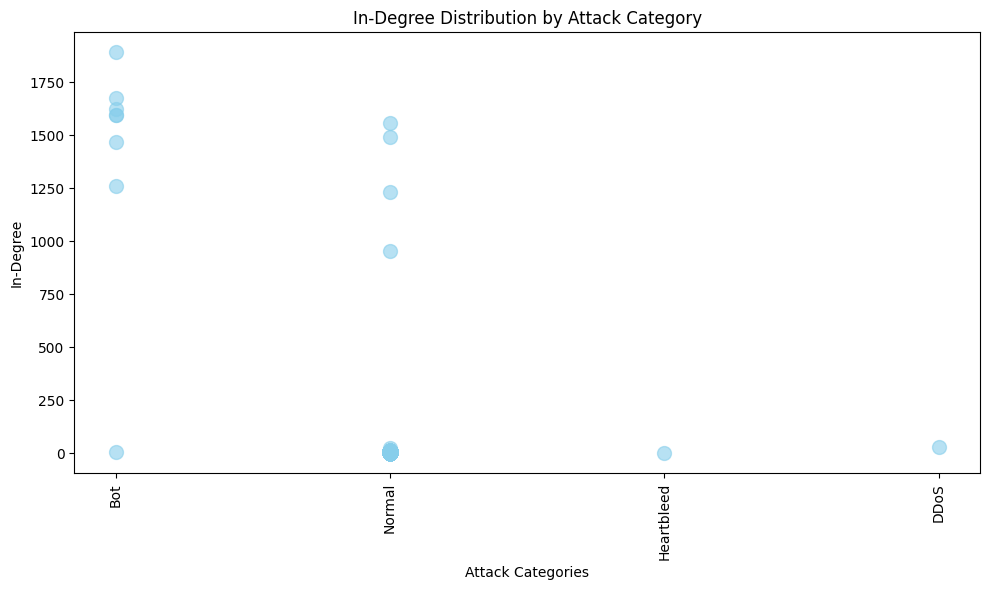

In [1]:
from collections import defaultdict
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from CIC_IDS_2017_config import CIC_IDS_2017_Config

SOURCE_COL = CIC_IDS_2017_Config.SOURCE_IP_COL_NAME
DESTINATION_COL = CIC_IDS_2017_Config.DESTINATION_IP_COL_NAME
CATEGORY_COL = CIC_IDS_2017_Config.ATTACK_CLASS_COL_NAME

BENIGN_CLASS_NAME = CIC_IDS_2017_Config.BENIGN_CLASS_NAME

df = pd.read_csv('./All/all_downsampled.csv')

G = nx.DiGraph()

G.add_edges_from(
    (row[SOURCE_COL], row[DESTINATION_COL], {CATEGORY_COL: row[CATEGORY_COL]})
    for _, row in df.iterrows()
)

category_in_degrees = defaultdict(list)

for node in G.nodes:
    in_edges = G.in_edges(node, data=True)
    out_edges = G.out_edges(node, data=True)

    attacker = False
    for _, _, data in out_edges:
        if data.get(CATEGORY_COL) != BENIGN_CLASS_NAME:  # Check if the edge is labeled as an attack
            attacker = True
            category = data.get(CATEGORY_COL, 'Unknown')
            category_in_degrees[category].append(len(in_edges))
            break

    if not attacker:
        category_in_degrees['Normal'].append(len(in_edges))

plt.figure(figsize=(10, 6))

# Prepare data for scatter plot
categories = []
in_degrees = []

for category, degrees in category_in_degrees.items():
    categories.extend([category] * len(degrees))
    in_degrees.extend(degrees)

plt.scatter(categories, in_degrees, color='skyblue', s=100, alpha=0.6)
plt.xlabel('Attack Categories')
plt.ylabel('In-Degree')
plt.title('In-Degree Distribution by Attack Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import os
np.set_printoptions(threshold=np.inf)

pd.set_option('display.max_rows', None)        # Show all rows
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.max_colwidth', None)    # Don't truncate string values
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping


def print_attack_node_and_their_in_traffic(df):

    # Strip whitespaces 
    df.columns = df.columns.str.strip()
    
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # Find all attacker nodes
    attacker_nodes = df[df[CATEGORY_COL] != BENIGN_CLASS_NAME][SOURCE_COL].unique()
    print("Attacker Nodes:", attacker_nodes)

    # Find all traffic where attacker node is the destination
    directed_to_attacker_traffic = df[df[DESTINATION_COL].isin(attacker_nodes)]

    # Find all nodes that have directed traffic to attacker nodes
    source_node_to_attacker = directed_to_attacker_traffic[SOURCE_COL].unique()
    print("Source Node to Attacker:", source_node_to_attacker)

    attack_directed_to_attacker_traffic = directed_to_attacker_traffic[directed_to_attacker_traffic[CATEGORY_COL] != BENIGN_CLASS_NAME]
    
    print("Example Attacks on Attacker Nodes:", attack_directed_to_attacker_traffic.groupby(SOURCE_COL).head(1))

    print("Source Node to Attacker with Attack Traffic:", attack_directed_to_attacker_traffic[SOURCE_COL].unique())

    print("No of Attacks on Attacker Nodes:", len(attack_directed_to_attacker_traffic))

    directed_to_attacker_traffic_attack_type = directed_to_attacker_traffic[CATEGORY_COL].unique()
    print("Traffic to Attacker Nodes Attack Type:", directed_to_attacker_traffic_attack_type)


# Directory containing the CSV files
directory = './TrafficLabelling'

# Iterate through all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        print(f"Processing file: {filename}")
        
        # Read the CSV file
        df = pd.read_csv(file_path, header=0)
        
        # Run the function
        print_attack_node_and_their_in_traffic(df)

Processing file: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


/tmp/ipykernel_189577/1669618511.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Attacker Nodes: ['172.16.0.1' '192.168.10.50']
Source Node to Attacker: ['192.168.10.12' '192.168.10.16' '192.168.10.19' '192.168.10.25'
 '192.168.10.17' '192.168.10.5' '192.168.10.9' '192.168.10.14'
 '192.168.10.15' '192.168.10.8' '192.168.10.3' '172.16.0.1'
 '192.168.10.50']
Example Attacks on Attacker Nodes:                                     Flow ID      Source IP  Source Port Destination IP  Destination Port  Protocol      Timestamp  Flow Duration  Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean   Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  Fwd PSH Flags  Bwd PSH Flags  

/tmp/ipykernel_189577/1669618511.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Attacker Nodes: []
Source Node to Attacker: []
Example Attacks on Attacker Nodes: Empty DataFrame
Columns: [Flow ID, Source IP, Source Port, Destination IP, Destination Port, Protocol, Timestamp, Flow Duration, Total Fwd Packets, Total Backward Packets, Total Length of Fwd Packets, Total Length of Bwd Packets, Fwd Packet Length Max, Fwd Packet Length Min, Fwd Packet Length Mean, Fwd Packet Length Std, Bwd Packet Length Max, Bwd Packet Length Min, Bwd Packet Length Mean, Bwd Packet Length Std, Flow Bytes/s, Flow Packets/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Total, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Total, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Length, Bwd Header Length, Fwd Packets/s, Bwd Packets/s, Min Packet Length, Max Packet Length, Packet Length Mean, Packet Length Std, Packet Length Variance, FIN Flag Count, SYN Flag Count, RST Flag Count, PS

/tmp/ipykernel_189577/1669618511.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Attacker Nodes: ['172.16.0.1']
Source Node to Attacker: ['192.168.10.50']
Example Attacks on Attacker Nodes: Empty DataFrame
Columns: [Flow ID, Source IP, Source Port, Destination IP, Destination Port, Protocol, Timestamp, Flow Duration, Total Fwd Packets, Total Backward Packets, Total Length of Fwd Packets, Total Length of Bwd Packets, Fwd Packet Length Max, Fwd Packet Length Min, Fwd Packet Length Mean, Fwd Packet Length Std, Bwd Packet Length Max, Bwd Packet Length Min, Bwd Packet Length Mean, Bwd Packet Length Std, Flow Bytes/s, Flow Packets/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Total, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Total, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Length, Bwd Header Length, Fwd Packets/s, Bwd Packets/s, Min Packet Length, Max Packet Length, Packet Length Mean, Packet Length Std, Packet Length Variance, FIN Flag Count, SYN Fla

/tmp/ipykernel_189577/1669618511.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Attacker Nodes: ['192.168.10.8']
Source Node to Attacker: ['172.217.10.226' '216.58.219.238' '157.240.0.35' '172.217.12.206'
 '172.217.10.34' '172.217.10.230' '172.217.7.131' '74.119.118.74'
 '74.119.118.100' '89.255.249.54' '172.217.10.142' '188.132.227.242'
 '66.114.49.26' '52.216.224.179' '23.194.109.170' '72.21.81.228'
 '212.68.50.248' '146.88.138.76' '23.50.75.27' '52.39.237.157'
 '35.190.133.242' '54.84.115.131' '35.165.158.113' '204.11.109.66'
 '54.192.48.232' '23.54.187.27' '63.251.98.12' '95.142.20.244'
 '74.119.118.86' '199.38.164.54' '46.20.149.34' '66.180.64.115'
 '72.21.91.29' '23.65.234.7' '178.250.0.78' '192.168.10.3'
 '35.166.101.186' '34.211.94.203' '213.239.195.215' '213.180.193.119'
 '34.198.109.29' '52.205.212.90' '52.84.26.146' '104.97.83.15'
 '212.68.50.18' '23.210.202.42' '104.16.207.165' '172.217.3.106'
 '172.217.6.227' '31.13.80.12' '172.217.10.1' '74.125.192.155'
 '172.217.10.238' '104.16.24.235' '172.217.7.164' '178.63.46.205'
 '220.162.97.209' '54.192.48.95'

/tmp/ipykernel_189577/1669618511.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Attacker Nodes: ['172.16.0.1']
Source Node to Attacker: ['192.168.10.50' '192.168.10.25' '192.168.10.51' '192.168.10.3']
Example Attacks on Attacker Nodes: Empty DataFrame
Columns: [Flow ID, Source IP, Source Port, Destination IP, Destination Port, Protocol, Timestamp, Flow Duration, Total Fwd Packets, Total Backward Packets, Total Length of Fwd Packets, Total Length of Bwd Packets, Fwd Packet Length Max, Fwd Packet Length Min, Fwd Packet Length Mean, Fwd Packet Length Std, Bwd Packet Length Max, Bwd Packet Length Min, Bwd Packet Length Mean, Bwd Packet Length Std, Flow Bytes/s, Flow Packets/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Total, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Total, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Length, Bwd Header Length, Fwd Packets/s, Bwd Packets/s, Min Packet Length, Max Packet Length, Packet Length Mean, Packet Length Std, 

/tmp/ipykernel_189577/1669618511.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Attacker Nodes: ['192.168.10.12' '192.168.10.9' '205.174.165.73' '192.168.10.15'
 '192.168.10.14' '192.168.10.5' '192.168.10.8' '192.168.10.17']
Source Node to Attacker: ['192.168.10.3' '192.168.10.50' '64.4.27.50' '13.78.188.147' '64.4.54.254'
 '220.243.219.55' '72.21.91.29' '52.10.50.117' '52.84.145.172'
 '65.152.202.208' '13.82.187.188' '64.4.54.36' '134.170.51.247'
 '23.15.4.8' '52.11.17.245' '52.36.207.192' '35.165.158.113' '23.36.33.93'
 '210.157.19.63' '206.126.112.141' '172.217.10.238' '104.16.27.216'
 '35.167.184.4' '35.164.51.247' '52.84.3.76' '52.84.145.248'
 '184.84.243.218' '184.84.243.202' '216.58.219.206' '52.11.31.31'
 '52.43.87.30' '23.199.172.161' '104.97.95.20' '8.253.154.120'
 '23.15.4.24' '40.77.228.69' '64.4.54.18' '52.40.81.184' '65.55.138.126'
 '23.194.182.93' '52.84.140.85' '52.84.140.31' '52.43.9.103'
 '23.194.182.11' '104.20.170.20' '72.5.205.53' '199.193.119.50'
 '52.84.145.242' '72.5.205.62' '23.50.75.27' '204.93.43.11'
 '52.84.145.155' '52.84.145.75' '216.

/tmp/ipykernel_189577/1669618511.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Attacker Nodes: ['172.16.0.1']
Source Node to Attacker: ['192.168.10.50' '192.168.10.51']
Example Attacks on Attacker Nodes: Empty DataFrame
Columns: [Flow ID, Source IP, Source Port, Destination IP, Destination Port, Protocol, Timestamp, Flow Duration, Total Fwd Packets, Total Backward Packets, Total Length of Fwd Packets, Total Length of Bwd Packets, Fwd Packet Length Max, Fwd Packet Length Min, Fwd Packet Length Mean, Fwd Packet Length Std, Bwd Packet Length Max, Bwd Packet Length Min, Bwd Packet Length Mean, Bwd Packet Length Std, Flow Bytes/s, Flow Packets/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Total, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Total, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Length, Bwd Header Length, Fwd Packets/s, Bwd Packets/s, Min Packet Length, Max Packet Length, Packet Length Mean, Packet Length Std, Packet Length Variance, FIN Fla

/tmp/ipykernel_189577/1669618511.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Attacker Nodes: ['172.16.0.1']
Source Node to Attacker: ['192.168.10.50']
Example Attacks on Attacker Nodes: Empty DataFrame
Columns: [Flow ID, Source IP, Source Port, Destination IP, Destination Port, Protocol, Timestamp, Flow Duration, Total Fwd Packets, Total Backward Packets, Total Length of Fwd Packets, Total Length of Bwd Packets, Fwd Packet Length Max, Fwd Packet Length Min, Fwd Packet Length Mean, Fwd Packet Length Std, Bwd Packet Length Max, Bwd Packet Length Min, Bwd Packet Length Mean, Bwd Packet Length Std, Flow Bytes/s, Flow Packets/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Total, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Total, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Length, Bwd Header Length, Fwd Packets/s, Bwd Packets/s, Min Packet Length, Max Packet Length, Packet Length Mean, Packet Length Std, Packet Length Variance, FIN Flag Count, SYN Fla